In [1]:
import face_recognition
import matplotlib.pyplot as plt
import json
from pathlib import Path
import os
import pandas as pd
import cv2
from deepface import DeepFace
from deepface.detectors import FaceDetector
from skimage import io
import numpy as np

In [2]:
# -- Paths
data_directory = '/mnt/DATA/datasets'
json_path = data_directory + '/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v2.json'

In [3]:
# -- General variables
fs = 8 #sampling freq of frames
seconds_window = 10 # time to go before and after

## Detect and save faces

In [4]:
# -- Reading annotations (Labels) 
with open(json_path) as f:
    data = json.load(f)

annotations = data['annotations']
for i in range (0,len(annotations)):
    if(annotations[i]['gameTime'][0] == '2'):
        index=i
        break
an1 = annotations[:index]
an2 = annotations[index:]
actions = [an1,an2]

In [7]:
# -- Extracting Faces DataFrame

faces = pd.DataFrame(columns=['face_locations','current_frame','action_frame','action_position','action_name','action_time','half'])
match_path = Path('/mnt/DATA/datasets/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley')

detector_name = 'retinaface'
detector = FaceDetector.build_model(detector_name)

for half in range (0,2):
    frames_dir = match_path.joinpath(f'{half+1}_HQ/frames8fps')
    action_list = actions[half]

    # going action by action
    for action in action_list[1:]:
        print(action)
        position = int(action['position'])
        
        frame_num = get_frame(position, fs)
        first_action_frame, last_action_frame = first_last_frame(frame_num, seconds_window, fs)
        
        # going frame by frame inside the action
        for i in range (first_action_frame, last_action_frame):
            frame_path = frames_dir.joinpath(f'{i:05}' +'.jpg')
            #image = face_recognition.load_image_file(frame_path)
            #face_locations = face_recognition.face_locations(image)
            
            image = io.imread(frame_path)
            face_loc = FaceDetector.detect_faces(detector, detector_name, image)
            array = np.array(face_loc)
            face_locations = []
            for arr in array:
                face_locations.append(arr[1])
            print(i)
            print(face_locations)
            if(len(face_locations)>0):
                faces = faces.append({'face_locations':face_locations,'current_frame':i, 'action_frame':frame_num,
                                      'action_position':position, 'action_name':action['label'], 'action_time':action['gameTime'],
                                      'half':half+1}, ignore_index=True)

{'gameTime': '1 - 02:13', 'label': 'Ball out of play', 'position': '133295', 'team': 'not applicable', 'visibility': 'visible'}
984
[]
985
[]
986
[]
987
[]
988
[]
989
[]
990
[]
991
[]
992
[]
993
[]
994
[]
995
[]
996
[]
997
[]
998
[]
999
[]
1000
[]
1001
[]
1002
[]
1003
[]
1004
[]
1005
[]
1006
[]
1007
[]
1008
[]
1009
[]
1010
[]
1011
[]
1012
[]
1013
[]
1014
[]
1015
[]
1016
[]
1017
[]
1018
[]
1019
[]
1020
[]
1021
[]
1022
[]
1023
[]
1024
[]
1025
[]
1026
[]
1027
[]
1028
[]
1029
[]
1030
[]
1031
[]
1032
[]
1033
[]
1034
[]
1035
[]
1036
[]
1037
[]
1038
[]
1039
[]
1040
[]
1041
[]
1042
[]
1043
[]
1044
[]
1045
[]
1046
[]
1047
[]
1048
[]
1049
[]
1050
[]
1051
[]
1052
[]
1053
[]
1054
[]
1055
[]
1056
[]
1057
[]
1058
[]
1059
[]
1060
[]
1061
[]
1062
[]
1063
[]
1064
[]
1065
[]
1066
[]
1067
[]
1068
[]
1069
[]
1070
[]
1071
[]
1072
[]
1073
[]
1074
[]
1075
[]
1076
[]
1077
[]
1078
[]
1079
[]
1080
[]
1081
[]
1082
[]
1083
[]
1084
[]
1085
[]
1086
[]
1087
[]
1088
[]
1089
[]
1090
[]
1091
[]
1092
[]
1093
[]
1094
[]


KeyboardInterrupt: 

In [ ]:
#faces.to_json('CELTA-MADRID-RETINAFACE_face_locations_allmatch_8fps_+-10.json', orient='records')


In [ ]:
faces

In [6]:
def frame_to_min(frame):
    s = frame // 2
    mins = s // 60
    sec = s % 60
    return str(mins)+':'+str(sec)

def get_frame(position, fs):
    return (position//1000)*fs

def first_last_frame(frame_num, seconds_window, fs):
    
    if (frame_num-(seconds_window*fs)>0):
        f = frame_num-(seconds_window*fs)
    else:
        f = 1
    if (frame_num + (seconds_window*fs) > len(os.listdir(frames_dir))):
        l = len(os.listdir(frames_dir))
    else:
        l = frame_num + (seconds_window*fs)
        
    return f, l

In [ ]:
# faces.to_json('face_locations_allmatch_8fps_+-10.json', orient='records')

## Prueba

In [129]:
faces = pd.read_json('face_locations_allmatch_8fps_+-10.json')
faces.loc[100]

face_locations     [[326, 985, 362, 949], [262, 625, 298, 589], [...
current_frame                                                   1445
action_frame                                                    1456
action_position                                               182775
action_name                                                   Corner
action_time                                                1 - 03:02
half                                                               1
Name: 100, dtype: object

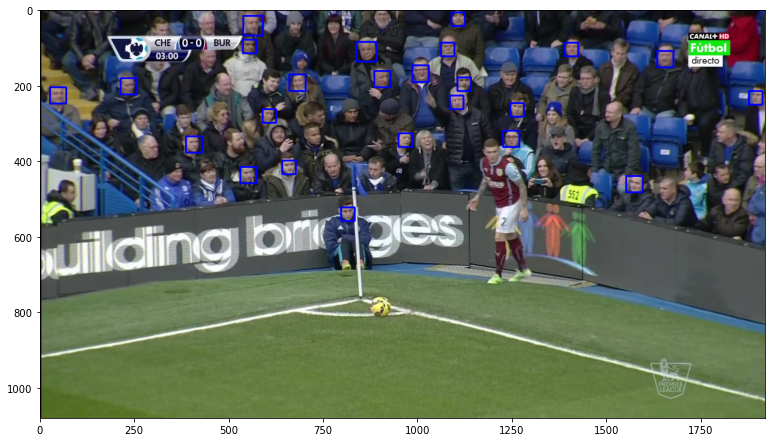

In [132]:
face_locations = faces['face_locations'][100]
path = '/mnt/DATA/datasets/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames8fps/01445.jpg'
image = face_recognition.load_image_file(path)

if len(face_locations)>0:
            for face in face_locations:
                cv2.rectangle(image, (face[3], face[0]), (face[1],face[2]), (0,0,255), 3)
            fig = plt.figure(figsize=(15,7.5)) 
            plt.imshow(image)
            plt.show() 